所谓数据清洗主要处理的是数据中的缺失值、异常值和重复值

## 缺失值处理

数据缺失值指由于各种原因导致数据中存在的空缺值：数据库中的null，python返回对象none，pandas或numpy中的nan；另空字符串是有实体的不算是缺失值，缺失值没有实体。

处理数据缺失值一般有4中方法：
1. 丢弃
2. 补全
3. 真值转化
4. 不处理



### 丢弃
如果缺失的数据量不大，且对其丢弃对数据特征的影响有限，可以选着丢弃，毕竟这样容易操作。某一列丢失的数据过多，为了避免增加噪声，可以丢弃。

### 补全
相对于丢弃补全更常用，毕竟数据的完整性很重要，但是补全的方式也很重要，会影响到后续的数据处理。
对全的方法：
+ 用平均值、中值、分位数、众数、随机值等替代。效果一般，因为等于人为增加了噪声。
+ 建立一个模型来“预测”缺失的数据。
+ 对于重要的数据，可以专家不足，或是调用数据源头补全，缺点是成本高

### 转化法
我们承认缺失值的存在，并且把数据缺失也作为数据分布规律的一部分，这将变量的实际值和缺失值都作为输入维度参与后续数据处理和模型计算。但是变量的实际值可以作为变量值参与模型计算，而缺失值通常无法参与运算，因此需要对缺失值进行真值转换。

以用户性别字段为例，很多数据库集都无法对会员的性别进行补足，但又舍不得将其丢弃，那么我们将选择将其中的值，包括男、女、未知从一个变量的多个值分布状态转换为多个变量的真值分布状态。

### 不处理
一些模型可以自己处理缺失值，所以可以不对缺失值进行处理。常见的能够自动处理缺失值的模型包括：KNN、决策树和随机森林、神经网络和朴素贝叶斯、DBSCAN（基于密度的带有噪声的空间聚类）等

In [1]:
# 数据缺失值处理
import pandas as pd
import numpy as np
from sklearn.preprocessing import Imputer
import random

In [82]:
df1 = pd.read_csv('https://raw.githubusercontent.com/ffzs/dataset/master/boston/train.csv')

In [83]:
df1.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [38]:
# 导入数据
df0 = pd.read_csv('train.csv')

In [58]:
df = df0.iloc[:10,:7]

In [4]:
# 查看是否有缺失值
df.isna().values.any()

False

In [5]:
# 数据行列
df.shape

(10, 7)

In [6]:
# 制造10个缺失值
for i in range(10):
    df.iloc[random.choice(range(10)), random.choice(range(3,7))] = np.nan

In [7]:
df

,ID,crim,zn,indus,chas,nox,rm
0,1,0.00632,18.0,2.31,NaN,NaN,NaN
1,2,0.02731,0.0,7.07,0.0,0.469,NaN
2,4,0.03237,0.0,2.18,0.0,0.458,6.998
3,5,0.06905,0.0,2.18,0.0,0.458,7.147
4,7,0.08829,12.5,7.87,0.0,NaN,6.012
5,11,0.22489,12.5,7.87,0.0,NaN,6.377
6,12,0.11747,12.5,7.87,0.0,0.524,NaN
7,13,0.09378,12.5,7.87,NaN,0.524,5.889
8,14,0.62976,0.0,NaN,0.0,0.538,5.949
9,15,0.63796,0.0,8.14,0.0,0.538,6.096


In [8]:
# 获取全为na的列
df.isna().all()

ID       False
crim     False
zn       False
indus    False
chas     False
nox      False
rm       False
dtype: bool

In [9]:
# 获取含有na的列
df.isnull().any()

ID       False
crim     False
zn       False
indus     True
chas      True
nox       True
rm        True
dtype: bool

In [10]:
# 查看缺失值分布
df.isna().sum()

ID       0
crim     0
zn       0
indus    1
chas     2
nox      3
rm       3
dtype: int64

In [11]:
# 丢弃缺失值
df_droped = df.dropna()
df_droped

,ID,crim,zn,indus,chas,nox,rm
2,4,0.03237,0.0,2.18,0.0,0.458,6.998
3,5,0.06905,0.0,2.18,0.0,0.458,7.147
9,15,0.63796,0.0,8.14,0.0,0.538,6.096


In [12]:
# 少了多少数据
df.shape[0] - df_droped.shape[0]

7

In [13]:
# 将缺失值替代为特定值
# 用后面的值替代缺失值
df.fillna(method='backfill')

,ID,crim,zn,indus,chas,nox,rm
0,1,0.00632,18.0,2.31,0.0,0.469,6.998
1,2,0.02731,0.0,7.07,0.0,0.469,6.998
2,4,0.03237,0.0,2.18,0.0,0.458,6.998
3,5,0.06905,0.0,2.18,0.0,0.458,7.147
4,7,0.08829,12.5,7.87,0.0,0.524,6.012
5,11,0.22489,12.5,7.87,0.0,0.524,6.377
6,12,0.11747,12.5,7.87,0.0,0.524,5.889
7,13,0.09378,12.5,7.87,0.0,0.524,5.889
8,14,0.62976,0.0,8.14,0.0,0.538,5.949
9,15,0.63796,0.0,8.14,0.0,0.538,6.096


In [14]:
# 限制每一个后值只能替换一个缺失值
df.fillna(method='bfill', limit=1)

,ID,crim,zn,indus,chas,nox,rm
0,1,0.00632,18.0,2.31,0.0,0.469,NaN
1,2,0.02731,0.0,7.07,0.0,0.469,6.998
2,4,0.03237,0.0,2.18,0.0,0.458,6.998
3,5,0.06905,0.0,2.18,0.0,0.458,7.147
4,7,0.08829,12.5,7.87,0.0,NaN,6.012
5,11,0.22489,12.5,7.87,0.0,0.524,6.377
6,12,0.11747,12.5,7.87,0.0,0.524,5.889
7,13,0.09378,12.5,7.87,0.0,0.524,5.889
8,14,0.62976,0.0,8.14,0.0,0.538,5.949
9,15,0.63796,0.0,8.14,0.0,0.538,6.096


In [15]:
# 用前值替换缺失值，如果没有前值则没法替换
df.fillna(method='pad')

,ID,crim,zn,indus,chas,nox,rm
0,1,0.00632,18.0,2.31,NaN,NaN,NaN
1,2,0.02731,0.0,7.07,0.0,0.469,NaN
2,4,0.03237,0.0,2.18,0.0,0.458,6.998
3,5,0.06905,0.0,2.18,0.0,0.458,7.147
4,7,0.08829,12.5,7.87,0.0,0.458,6.012
5,11,0.22489,12.5,7.87,0.0,0.458,6.377
6,12,0.11747,12.5,7.87,0.0,0.524,6.377
7,13,0.09378,12.5,7.87,0.0,0.524,5.889
8,14,0.62976,0.0,7.87,0.0,0.538,5.949
9,15,0.63796,0.0,8.14,0.0,0.538,6.096


In [16]:
# 插值法就是通过两点（x0，y0），（x1，y1）估计中间点的值 必须有前后值
df.interpolate() 

,ID,crim,zn,indus,chas,nox,rm
0,1,0.00632,18.0,2.310,NaN,NaN,NaN
1,2,0.02731,0.0,7.070,0.0,0.469,NaN
2,4,0.03237,0.0,2.180,0.0,0.458,6.998
3,5,0.06905,0.0,2.180,0.0,0.458,7.147
4,7,0.08829,12.5,7.870,0.0,0.480,6.012
5,11,0.22489,12.5,7.870,0.0,0.502,6.377
6,12,0.11747,12.5,7.870,0.0,0.524,6.133
7,13,0.09378,12.5,7.870,0.0,0.524,5.889
8,14,0.62976,0.0,8.005,0.0,0.538,5.949
9,15,0.63796,0.0,8.140,0.0,0.538,6.096


In [17]:
# 用0值替换缺失值
df.fillna(0)

,ID,crim,zn,indus,chas,nox,rm
0,1,0.00632,18.0,2.31,0.0,0.000,0.000
1,2,0.02731,0.0,7.07,0.0,0.469,0.000
2,4,0.03237,0.0,2.18,0.0,0.458,6.998
3,5,0.06905,0.0,2.18,0.0,0.458,7.147
4,7,0.08829,12.5,7.87,0.0,0.000,6.012
5,11,0.22489,12.5,7.87,0.0,0.000,6.377
6,12,0.11747,12.5,7.87,0.0,0.524,0.000
7,13,0.09378,12.5,7.87,0.0,0.524,5.889
8,14,0.62976,0.0,0.00,0.0,0.538,5.949
9,15,0.63796,0.0,8.14,0.0,0.538,6.096


In [18]:
# 用不同值替换
df.fillna(dict(nox=0.5, rm=6.0))

,ID,crim,zn,indus,chas,nox,rm
0,1,0.00632,18.0,2.31,NaN,0.500,6.000
1,2,0.02731,0.0,7.07,0.0,0.469,6.000
2,4,0.03237,0.0,2.18,0.0,0.458,6.998
3,5,0.06905,0.0,2.18,0.0,0.458,7.147
4,7,0.08829,12.5,7.87,0.0,0.500,6.012
5,11,0.22489,12.5,7.87,0.0,0.500,6.377
6,12,0.11747,12.5,7.87,0.0,0.524,6.000
7,13,0.09378,12.5,7.87,NaN,0.524,5.889
8,14,0.62976,0.0,NaN,0.0,0.538,5.949
9,15,0.63796,0.0,8.14,0.0,0.538,6.096


In [37]:
# 用平均数替代，选择各自列的均值
df.fillna(df.mean()['chas':'rm'])

,ID,crim,zn,indus,chas,nox,rm
0,1,0.00632,18.0,2.31,0.0,0.501286,6.352571
1,2,0.02731,0.0,7.07,0.0,0.469000,6.352571
2,4,0.03237,0.0,2.18,0.0,0.458000,6.998000
3,5,0.06905,0.0,2.18,0.0,0.458000,7.147000
4,7,0.08829,12.5,7.87,0.0,0.501286,6.012000
5,11,0.22489,12.5,7.87,0.0,0.501286,6.377000
6,12,0.11747,12.5,7.87,0.0,0.524000,6.352571
7,13,0.09378,12.5,7.87,0.0,0.524000,5.889000
8,14,0.62976,0.0,NaN,0.0,0.538000,5.949000
9,15,0.63796,0.0,8.14,0.0,0.538000,6.096000


## 异常值处理

异常数据，是脱离数据正常分布范围的数据，即噪声，对异常处理需要先辨别异常数据是否为真正需要去除掉的数据

一下几个情况无需对异常数据进行处理：

### 异常数据源于业务运营
由于业务部门特定的动作导致数据分布异常：如双十一销量猛增，如果数据被剔除的话就无法真实对业务做反馈

### 异常检测模型
模型本身就是为了检测出数据中的异常数据，如果剔除掉了这些数据，本末倒置，如信用卡欺诈、药物识别、疾病预测、网络攻击等。

### 非异常敏感模型
如果数据算法和模型对异常值不敏感，不对异常值进行处理也不会对模型造成负面影响，如决策树

In [69]:
# 制造异常值
df = df0.iloc[:10,:7]
df.iloc[4, 5] = 100

In [66]:
df

,ID,crim,zn,indus,chas,nox,rm
0,1,0.00632,18.0,2.31,0,0.538,6.575
1,2,0.02731,0.0,7.07,0,0.469,6.421
2,4,0.03237,0.0,2.18,0,0.458,6.998
3,5,0.06905,0.0,2.18,0,0.458,7.147
4,7,0.08829,12.5,7.87,0,100.000,6.012
5,11,0.22489,12.5,7.87,0,0.524,6.377
6,12,0.11747,12.5,7.87,0,0.524,6.009
7,13,0.09378,12.5,7.87,0,0.524,5.889
8,14,0.62976,0.0,8.14,0,0.538,5.949
9,15,0.63796,0.0,8.14,0,0.538,6.096


In [67]:
# 用过Z-Scores方法判断异常值
# 复制一个dataframe来存储score
df_zscore = df.copy()
for col in df.columns:
    df_col = df[col]
    # 计算每个值的zscore
    z_score = (df_col - df_col.mean()) / df_col.std()
    # 判断Z-Score得分是否大于2.2
    df_zscore[col] = z_score.abs() > 2.2
df_zscore

,ID,crim,zn,indus,chas,nox,rm
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False


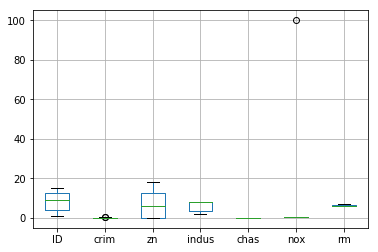

In [68]:
# 通过箱型图
%matplotlib inline
import matplotlib.pyplot as plt
df.boxplot()

对于有固定业务规则的可直接套用业务规则，而对于没有固定业务规则的，可以采用常见的数学模型进行判断，即基于概率分布的模型（例如正态分布的标准差范围）、基于聚类的方法（例如KMeans）、基于密度的方法（例如LOF）、基于分类的方法（例如KNN）、基于统计的方法（例如分位数法）等，此时异常值的定义带有较强的主观判断色彩，具体需要根据实际情况选择。

## 重复值处理
重复值包括以下两种情况：数据完全相同的多条数据；数据主体相同但是匹配到的唯一属性不同，多见于数据仓库的变化维度表，同一个事实表的主体匹配到多个属性。

以下情况需慎重去重：

### 重复计入用于分析演变规律
商品类别的维度表中，每个商品对应了同一类别的值是唯一的，但是在所有商品的类别的值重构或升级时，原有的商品可能被分配了类别中的不同值，对于这种情况需要跟业务进行协商再决定做去重处理。

### 为解决样本不均衡产生的重复值
处理分类数据建模过程中样本不均衡的问题，对数据量较少的样本类别偶简单过采样，这样会产生一些重复值也不能去重。

### 运营过程产生的重复记录
在运营过程中重复的数据可能意味着重大的运营规则问题，特别是这些重复值出现在企业经营中金钱相关的场景，如重复的订单，重复充值

这些数据一般产生于误操作，重复点击生成订单，如果这样的数据被视为重复数据去除掉的话，运营人员就无法发现出现的问题，无法及时对误操作产生的后果做补救。

In [70]:
# 创造重复值
df = df0.iloc[:5,:7]
df0 = pd.concat([df, df])

In [77]:
# 判断重复数据
df0.duplicated()

0    False
1    False
2    False
3    False
4    False
0     True
1     True
2     True
3     True
4     True
dtype: bool

In [76]:
# 删除重复值 
df0.drop_duplicates()

,ID,crim,zn,indus,chas,nox,rm
0,1,0.00632,18.0,2.31,0,0.538,6.575
1,2,0.02731,0.0,7.07,0,0.469,6.421
2,4,0.03237,0.0,2.18,0,0.458,6.998
3,5,0.06905,0.0,2.18,0,0.458,7.147
4,7,0.08829,12.5,7.87,0,0.524,6.012


In [78]:
# 根据特定列进行删除重复值
df0.drop_duplicates(['zn', 'chas'])

,ID,crim,zn,indus,chas,nox,rm
0,1,0.00632,18.0,2.31,0,0.538,6.575
1,2,0.02731,0.0,7.07,0,0.469,6.421
4,7,0.08829,12.5,7.87,0,0.524,6.012


In [81]:
# inplace 为 true 改变dataframe
df0.drop_duplicates(['zn', 'chas'], inplace=True)
df0

,ID,crim,zn,indus,chas,nox,rm
0,1,0.00632,18.0,2.31,0,0.538,6.575
1,2,0.02731,0.0,7.07,0,0.469,6.421
4,7,0.08829,12.5,7.87,0,0.524,6.012
